In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import SciFiReaders
import glob
from scipy.optimize import curve_fit

In [84]:
path = "."
os.chdir(path)

In [85]:
ibw_files = glob.glob(os.path.join(path, "TopoForHack/material1_perovksite/*.ibw"))
ibw_files

['./TopoForHack/material1_perovksite/Image_10um_01.ibw',
 './TopoForHack/material1_perovksite/image_1d2um_00.ibw',
 './TopoForHack/material1_perovksite/image_2um_01.ibw',
 './TopoForHack/material1_perovksite/Image_3um_00.ibw',
 './TopoForHack/material1_perovksite/Image_10um_00.ibw',
 './TopoForHack/material1_perovksite/image_2um_00.ibw',
 './TopoForHack/material1_perovksite/image_2um_02.ibw']

In [86]:
reader = SciFiReaders.IgorIBWReader(ibw_files[5])
data = reader.read()

{'Channel_000': sidpy.Dataset of type IMAGE with:
 dask.array<array, shape=(256, 256), dtype=float32, chunksize=(256, 256), chunktype=numpy.ndarray>
 data contains: HeightRetrace (m)
 and Dimensions: 
x:  x (m) of size (256,)
y:  y (m) of size (256,), 'Channel_001': sidpy.Dataset of type IMAGE with:
 dask.array<array, shape=(256, 256), dtype=float32, chunksize=(256, 256), chunktype=numpy.ndarray>
 data contains: DeflectionRetrace (m)
 and Dimensions: 
x:  x (m) of size (256,)
y:  y (m) of size (256,), 'Channel_002': sidpy.Dataset of type IMAGE with:
 dask.array<array, shape=(256, 256), dtype=float32, chunksize=(256, 256), chunktype=numpy.ndarray>
 data contains: ZSensorRetrace (m)
 and Dimensions: 
x:  x (m) of size (256,)
y:  y (m) of size (256,), 'Channel_003': sidpy.Dataset of type IMAGE with:
 dask.array<array, shape=(256, 256), dtype=float32, chunksize=(256, 256), chunktype=numpy.ndarray>
 data contains: UserIn0Trace (m)
 and Dimensions: 
x:  x (m) of size (256,)
y:  y (m) of size

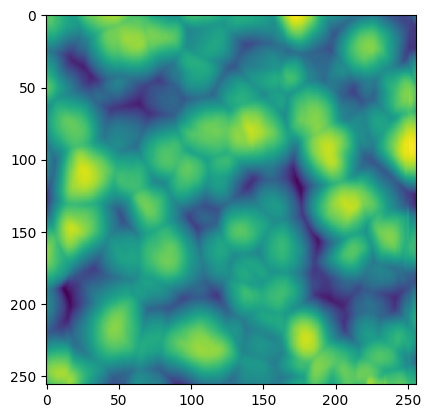

In [87]:
print(data)
height = data['Channel_000']
plt.imshow(height)

In [88]:
print(data['Channel_000'])

sidpy.Dataset of type IMAGE with:
 dask.array<array, shape=(256, 256), dtype=float32, chunksize=(256, 256), chunktype=numpy.ndarray>
 data contains: HeightRetrace (m)
 and Dimensions: 
x:  x (m) of size (256,)
y:  y (m) of size (256,)


In [89]:
height =  data['Channel_000']
height

sidpy.Dataset of type IMAGE with:
 dask.array<array, shape=(256, 256), dtype=float32, chunksize=(256, 256), chunktype=numpy.ndarray>
 data contains: HeightRetrace (m)
 and Dimensions: 
x:  x (m) of size (256,)
y:  y (m) of size (256,)

In [90]:
height[()].shape

(256, 256)

In [91]:
height = np.array(height)
height

array([[ 2.1242130e-08,  2.1657058e-08,  2.1690823e-08, ...,
        -2.4980693e-08, -2.1372585e-08, -1.6579293e-08],
       [ 2.1536266e-08,  2.1984732e-08,  2.2190648e-08, ...,
        -2.7580512e-08, -2.3976241e-08, -1.9307748e-08],
       [ 2.1604023e-08,  2.2039615e-08,  2.2512808e-08, ...,
        -3.0353362e-08, -2.6651435e-08, -2.2300611e-08],
       ...,
       [ 2.1113095e-08,  2.2950474e-08,  2.4821219e-08, ...,
         1.1439425e-08,  1.1013867e-08,  1.0560569e-08],
       [ 1.9293765e-08,  2.1158172e-08,  2.3020618e-08, ...,
         1.2357333e-08,  1.1792935e-08,  1.1522616e-08],
       [ 1.7364130e-08,  1.9174877e-08,  2.1028541e-08, ...,
         1.3091466e-08,  1.2495775e-08,  1.2259619e-08]], dtype=float32)

In [92]:
image = ((height - height.min()) / (height.max() - height.min()) * 255).astype('uint8') #normalize ibw for cv2

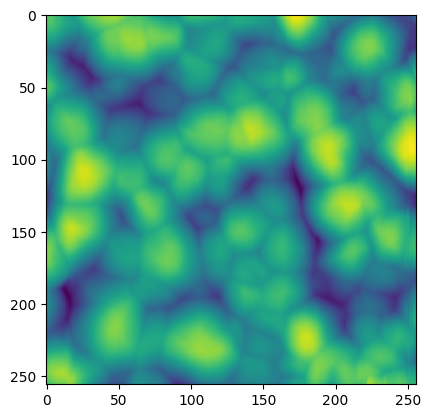

In [93]:
plt.imshow(image)

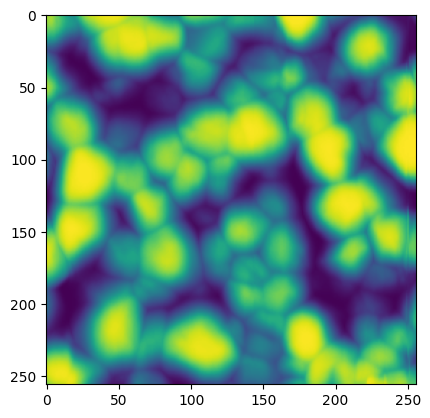

In [99]:
eq_hist = cv2.equalizeHist(image)
plt.imshow(eq_hist)

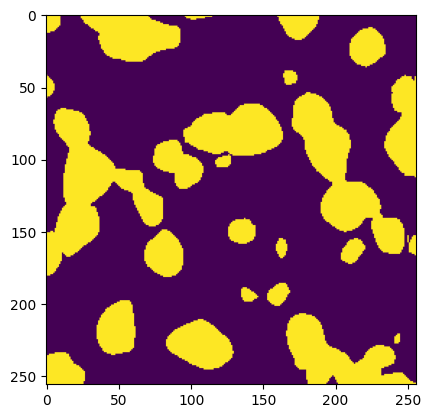

In [ ]:
_, threshold = _, thresh = cv2.threshold(eq_hist, 100, 255, cv2.THRESH_BINARY)
plt.imshow(threshold)